In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [5]:
conf = !python  parameters.py

In [6]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [7]:
## ESPECIFIC CONFIGS
configs.name="E99_9"
configs.n_devices=99
configs.n_jobs=9

In [8]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
data = np.array(df)

In [9]:
cases = np.unique(data[:,0])
cases

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [10]:
avg_pf = []
for case in cases:
    case_data = data[data[:,0]==case][:,[1,2]]
    best_pf_ix = (case_data.mean(axis=1)==min(case_data.mean(axis=1)))
    best_avg_pf = case_data[best_pf_ix]
    
    # ix = np.argmax(best_pf_ix)
    # print(best_avg_pf)
    # print(ix)
    
    avg_pf.append(best_avg_pf)
    # break

In [11]:
avg_pf = np.array(avg_pf)

In [12]:
avg_pf = avg_pf.reshape(len(cases),2)

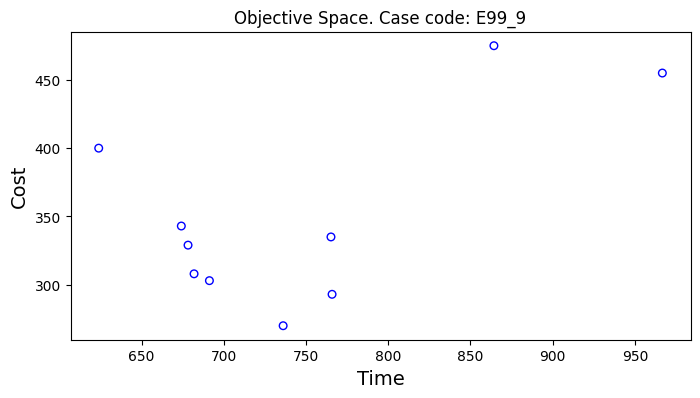

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [14]:
print(avg_pf[:,0].max())
print(avg_pf[:,1].max())

966.6666870117188
475.0


In [15]:
avg_pf.shape

(10, 2)

In [16]:
avg_pf[0]

array([736.08331299, 270.        ])

In [52]:

ref_point = np.array([1000., 500.])
ind = HV(ref_point=ref_point)
print("HV", ind(avg_pf)) 

HV 77616.41540527344


### All Dominant solutions for each case

In [8]:
episode, time, cost, exec_time = [],[],[],[]
for x in range(len(df)):
    episode.append(df[x][0])
    time.append(df[x][1])
    cost.append(df[x][2])
    exec_time.append(df[x][3])
episode = np.array(episode)
ftime = np.array(time)
fcost = np.array(cost)
exec_time = np.array(exec_time)
ftime.shape


(286,)

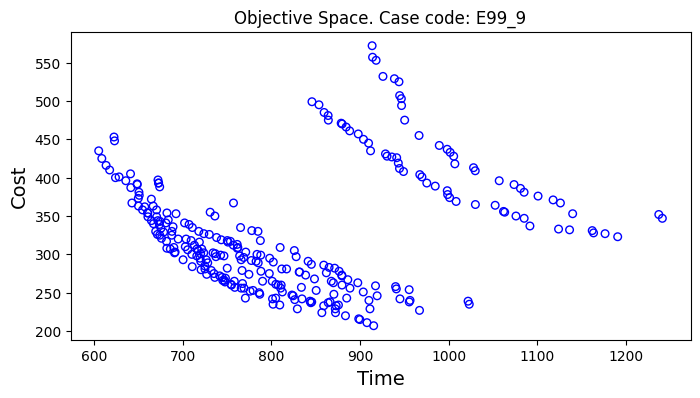

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(ftime, fcost, s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()